Estimation de densité à noyeau

In [1]:
import numpy as np
from numpy import random
import math
import matplotlib.pyplot as plt

In [85]:
m = 30
sigma = 2
N = 300

In [86]:
X = np.random.normal(m,sigma,N)
v = np.var(X)

In [103]:
def k(x):
    """noyeau de convolution"""
    return(np.exp(-x*x/2)/(np.sqrt(math.pi*2)))

def k_optimal(x,h,variance):
    """noyeau optimal"""
    return(k_h(x/variance,h)/variance)

def densite(m,sigma,x):
    """densité gaussienne"""
    return(k(x-m)/sigma)

def k_h(x,h):
    """suite regularisante"""
    return(k(x/h)/h)

def estimateur_densité(X,h,x,var):
    """estimateur de densité à noyeau"""
    n = np.shape(X)
    somme = 0
    for i in range(n[0]):
        somme+= k_optimal(X[i]-x,h,1)
    return(somme/n)

In [100]:
def plot(h,legend,X,var):
    N = np.shape(X)[0]
    t = np.linspace(m-10*sigma,m+10*sigma,10000)
    # estimateur_densité(X,h,1)
    Y = np.array([estimateur_densité(X,h,ti,var) for ti in t])
    plt.plot(t,Y)
    Y_true = np.array([densite(m,sigma,ti) for ti in t])
    plt.plot(t,Y_true)
    plt.legend([legend])

    erreur  = np.mean((Y_true-Y)**2)
    # print("erreur = "+str(erreur))
    #tester l'erreur contre une fonction test (l'erreur quadratique moyenne -->0)
    plt.show()

erreur = 0.007007316563931561


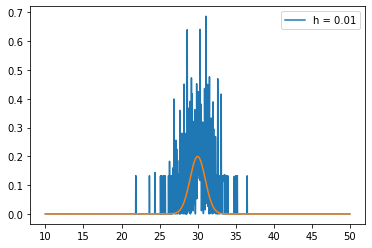

erreur = 0.005788135151826233


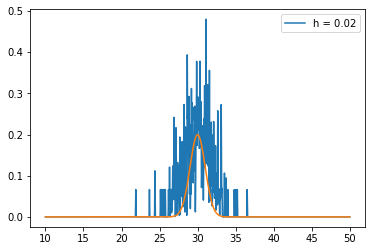

erreur = 0.005106812617794964


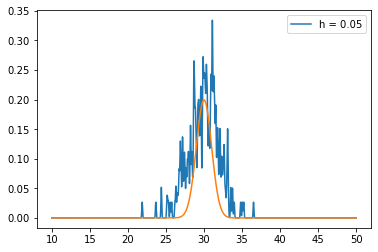

erreur = 0.0049129204866718325


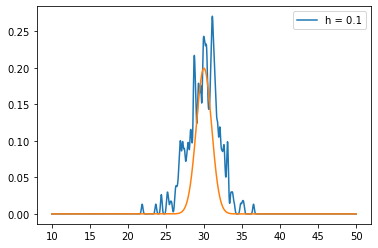

erreur = 0.0047951698171387076


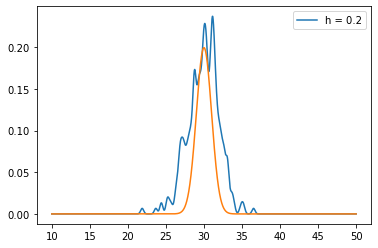

erreur = 0.004633299249698327


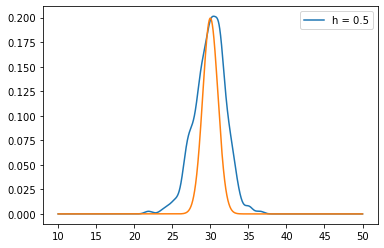

erreur = 0.004326877659600883


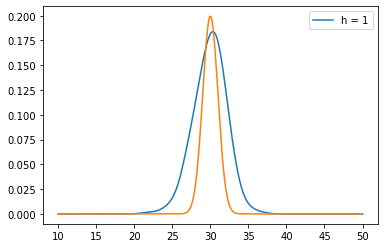

erreur = 0.0036317101414366764


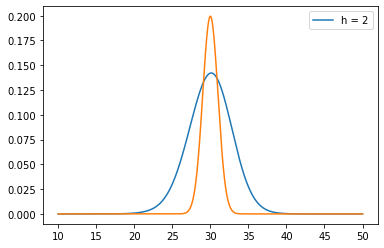

erreur = 0.0024446448064678857


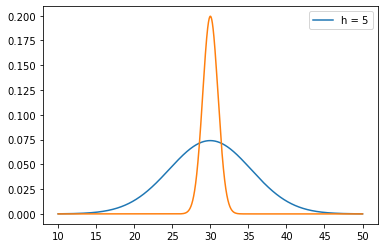

erreur = 0.0018563572615166958


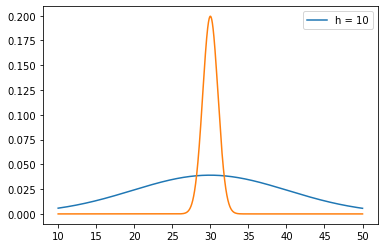

In [102]:
H = [0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10]
X = np.random.normal(m,sigma,N)
variance = np.var(X)
for h in H:
    plot(h,"h = "+str(h),X,1)


Implémentation du h optimal

erreur = 0.0043956458075627095


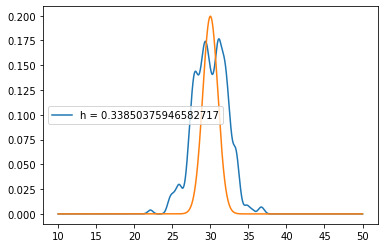

In [101]:
h_opt = ((4/3)**(1/5))/(N**(1/5))
plot(h_opt,"h = "+str(h_opt),X,variance)